In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\NLP Project\tweet.csv")
df=data.copy()

In [3]:
df.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [5]:
# Checking for duplicate data
df.duplicated().sum()

49

In [6]:
# Duplicate data
df[df.duplicated()]

,tweets,class
12617,#Irony,figurative
17820,#irony,figurative
21104,#sarcasm,figurative
31250,#ironic,irony
35871,#Irony,irony
36717,#irony,irony
39333,#Russia #Cartoon 4 #Bilderberg #Lobbyists:Yet ...,irony
39335,mikloshvanEgan: #Russia #Cartoon 4 #Bilderberg...,irony
39350,#Russia #Cartoon 4 #Bilderberg #Lobbyists:Yet ...,irony
39355,mikloshvanEgan: #Russia #Cartoon 4 #Bilderberg...,irony


In [7]:
# Removing duplicaates
df=df.drop_duplicates()
df = df.reset_index(drop=True)


In [8]:
# The total number of classes
df['class'].nunique()

4

In [9]:
# The unique class characteristics
df['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

In [10]:
# The value counts of each class
df['class'].value_counts()

figurative    21235
irony         20877
sarcasm       20678
regular       18569
Name: class, dtype: int64

- The frequency of occurencies of class characteristics are not much deviated, from this we can say that the given dataset is balanced data

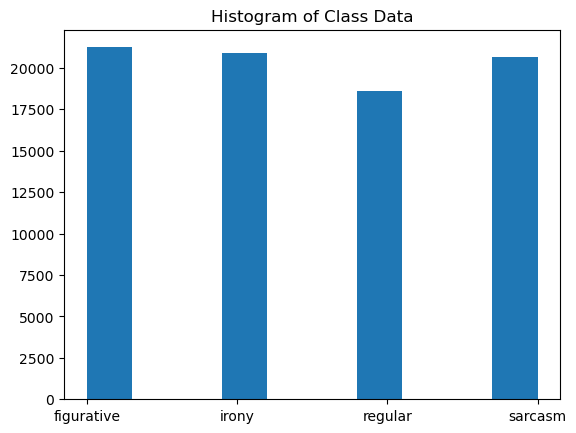

In [11]:
# Plotting Class data
plt.hist(df['class'])
plt.title('Histogram of Class Data')
plt.show()

### Key Insights:
- The data is balanced, the class counts are close to each other
- Regular is less common compare to others
- Figuratve, Irony & Sarcasm are close to each other

## Data Cleaning

In [12]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers,
    Removing URL's, hashtags, mentions, and special characters.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\@\w+|\#", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    return text

clean = lambda x: clean_text(x)

In [13]:
df['tweets']=df.tweets.apply(clean)

In [71]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweets']

def remove_stopwords(sentence):
    return " ".join(x for x in sentence.split() if x not in stop)

In [15]:
!pip install nltk

In [16]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aravi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df.head()

,tweets,class
0,aware dirty step get money staylight staywhite...,figurative
1,sarcasm people dont understand diy artattack,figurative
2,iminworkjeremy medsingle dailymail readers sen...,figurative
3,wilw get feeling like games sarcasm,figurative
4,teacherarthurg rweingarten probably missed tex...,figurative


In [18]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Function to apply Porter stemming to a single word
def apply_stemming(word):
    stemmer = PorterStemmer()
    return stemmer.stem(word)

# Apply Porter stemming to the 'text' column of the DataFrame
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([apply_stemming(word) for word in word_tokenize(x)]))

In [19]:
df.head()

,tweets,class
0,awar dirti step get money staylight staywhit s...,figurative
1,sarcasm peopl dont understand diy artattack,figurative
2,iminworkjeremi medsingl dailymail reader sensi...,figurative
3,wilw get feel like game sarcasm,figurative
4,teacherarthurg rweingarten probabl miss text s...,figurative


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81359 entries, 0 to 81358
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81359 non-null  object
 1   class   81359 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [21]:
df.to_csv(r'C:\Users\aravi\OneDrive\Desktop\NLP Project\data.csv', index=False)

In [22]:
apply_stemming("running") # Stemming for a single word

'run'

In [23]:
df['tweets'].head()

0    awar dirti step get money staylight staywhit s...
1          sarcasm peopl dont understand diy artattack
2    iminworkjeremi medsingl dailymail reader sensi...
3                      wilw get feel like game sarcasm
4    teacherarthurg rweingarten probabl miss text s...
Name: tweets, dtype: object

In [24]:
#Word frequency of top 20 words
freq = pd.Series(' '.join(df['tweets']).split()).value_counts()[:20] 
freq

sarcasm    30004
ironi      24132
iron        8358
get         4085
love        3848
like        3540
im          3496
news        3444
peopl       3319
amp         3156
peac        3136
late        3040
day         2988
polit       2973
educ        2960
humor       2954
drug        2939
one         2759
dont        2718
go          2575
dtype: int64

In [25]:
tweets = " ".join(df['tweets'])
type(tweets)

str

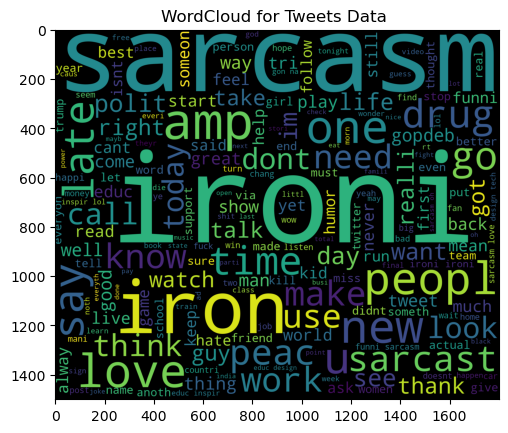

In [26]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(tweets)
plt.imshow(wordcloud_stw)
plt.title('WordCloud for Tweets Data ')
plt.show()

In [27]:
# Separating Figurative classified data
tweets_figurative=df[df['class']=='figurative']
figurative=" ".join(tweets_figurative['tweets'])

sarcasm    10214
ironi       7978
iron        2947
get         1227
im          1075
like        1037
peopl        990
love         984
day          836
dont         816
dtype: int64


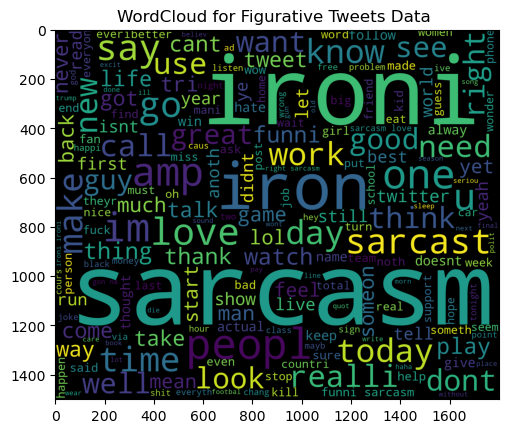

In [28]:
#Word frequency of top 10 words 
freq_figurative = pd.Series(' '.join(tweets_figurative['tweets']).split()).value_counts()[:10]
print(freq_figurative)
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(figurative)
plt.imshow(wordcloud_stw)
plt.title('WordCloud for Figurative Tweets Data ')
plt.show()

In [29]:
# Separating Irony classified data
tweets_irony=df[df['class']=='irony']
irony=" ".join(tweets_irony['tweets'])

In [30]:
irony

'fav moment sepp blatter vid clean first noth footbal ironi found walk human ironi detroit disrespect wife prophet pseudo libtard play blasphemi card ironi know super yeay satisfi feel get say exactli want say charact life goal ironi your go call someon ignor stupid social media least spell right ironi tune nigezi treat rachel platten fight song move mtv get reminisc amp olamid local rapper ironi timeschang look forward next week step away flash effect quicksilv ironi get work realiz oatmeal packet grab dinooatm monday ironi two recent tweet sexism favorit twitter account send pictur halfnak women ironi weirdtob wais block mean nida awesom u rememb haha larka wud love block ironi state want destroy caliph given way destroy nh might card ironi shouldnt demonis muslim communitybut believ freedom speech shut ironi cameronsspeech pleas disneypictur need captain america good ironi marvel milkthatcow mayb im sure that six word ironi typicalteach actual sign park lot local aa meet guess way a

ironi    16139
iron      5393
get       1151
peopl     1120
amp        982
like       940
one        869
im         861
say        815
day        771
dtype: int64


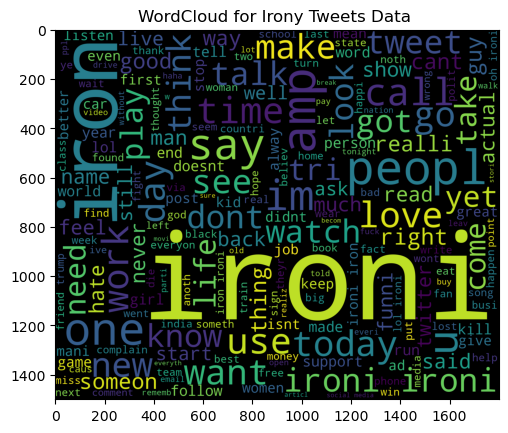

In [31]:
#Word frequency of top 10 words 
freq_irony = pd.Series(' '.join(tweets_irony['tweets']).split()).value_counts()[:10]
print(freq_irony)
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(irony)
plt.imshow(wordcloud_stw)
plt.title('WordCloud for Irony Tweets Data ')
plt.show()

In [32]:
# Separating Regular classified data
tweets_regular=df[df['class']=='regular']
regular=" ".join(tweets_regular['tweets'])

peac      2994
news      2932
drug      2815
educ      2812
late      2777
polit     2637
humor     2589
gopdeb    1441
love       892
funni      866
dtype: int64


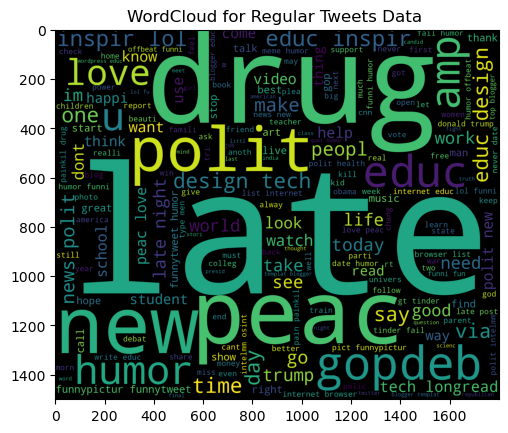

In [33]:
#Word frequency of top 10 words 
freq_regular = pd.Series(' '.join(tweets_regular['tweets']).split()).value_counts()[:10]
print(freq_regular)
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(regular)
plt.imshow(wordcloud_stw)
plt.title('WordCloud for Regular Tweets Data ')
plt.show()

In [34]:
# Separating Sarcasm classified data
tweets_sarcasm=df[df['class']=='sarcasm']
sarcasm=" ".join(tweets_sarcasm['tweets'])

sarcasm    19778
love        1364
sarcast     1251
im          1239
get         1178
like        1120
good         911
great        872
peopl        871
day          860
dtype: int64


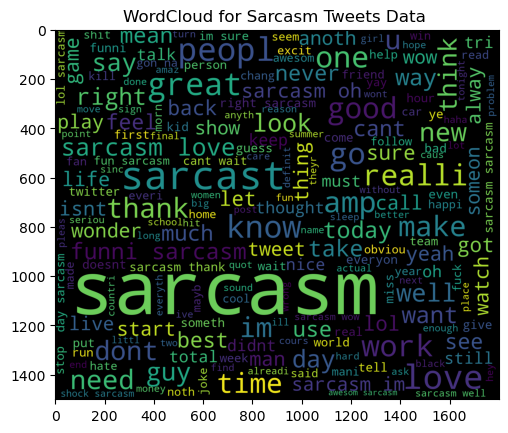

In [35]:
#Word frequency of top 10 words 
freq_sarcasm = pd.Series(' '.join(tweets_sarcasm['tweets']).split()).value_counts()[:10]
print(freq_sarcasm)
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(sarcasm)
plt.imshow(wordcloud_stw)
plt.title('WordCloud for Sarcasm Tweets Data ')
plt.show()

In [36]:
#Function for Bi-grams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n2_words_bigram(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [37]:
# Bi-gram for tweets dataset 
tweets_words_bi = get_top_n2_words_bigram(df['tweets'], n=200) #top 200
tweets_df_bi = pd.DataFrame(tweets_words_bi)
tweets_df_bi.columns=["Bi-gram", "Freq"]
tweets_df_bi.head()

,Bi-gram,Freq
0,funni sarcasm,513
1,educ inspir,437
2,inspir lol,430
3,design tech,387
4,gon na,369


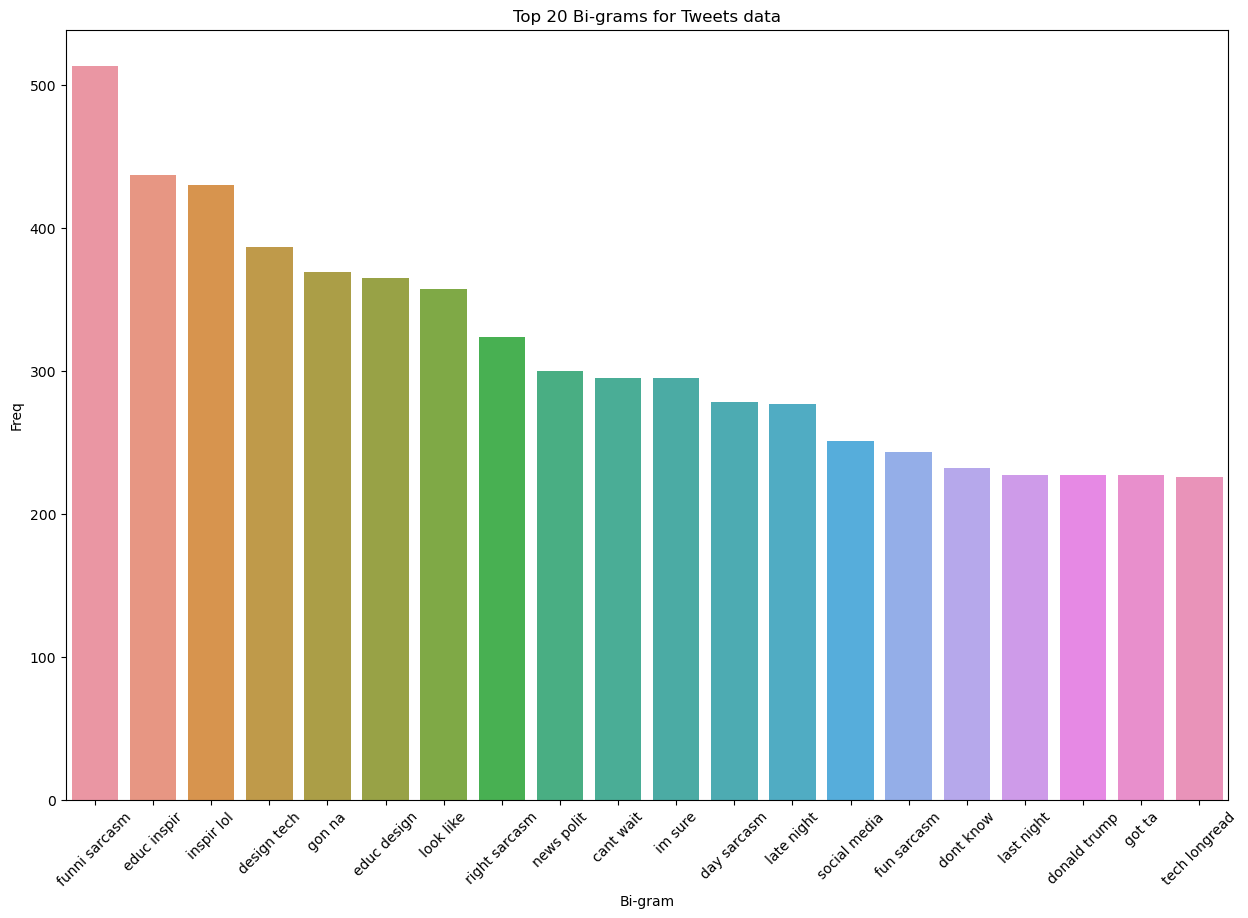

In [38]:
# Top 20 Bi-gram Bar chart for Tweets Data
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=tweets_df_bi['Bi-gram'][0:20],y=tweets_df_bi['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = tweets_df_bi["Bi-gram"][0:20])
plt.title('Top 20 Bi-grams for Tweets data')
plt.show()

In [39]:
# Trigram
def get_top_n2_words_trigram(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [40]:
# Tri-gram for tweets dataset
tweets_words_tri = get_top_n2_words_trigram(df['tweets'], n=200) #top 200
tweets_df_tri = pd.DataFrame(tweets_words_tri)
tweets_df_tri.columns=["Tri-gram", "Freq"]
tweets_df_tri.head()

,Tri-gram,Freq
0,educ inspir lol,430
1,educ design tech,363
2,design tech longread,226
3,funnypictur funnytweet humor,179
4,pict funnypictur funnytweet,158


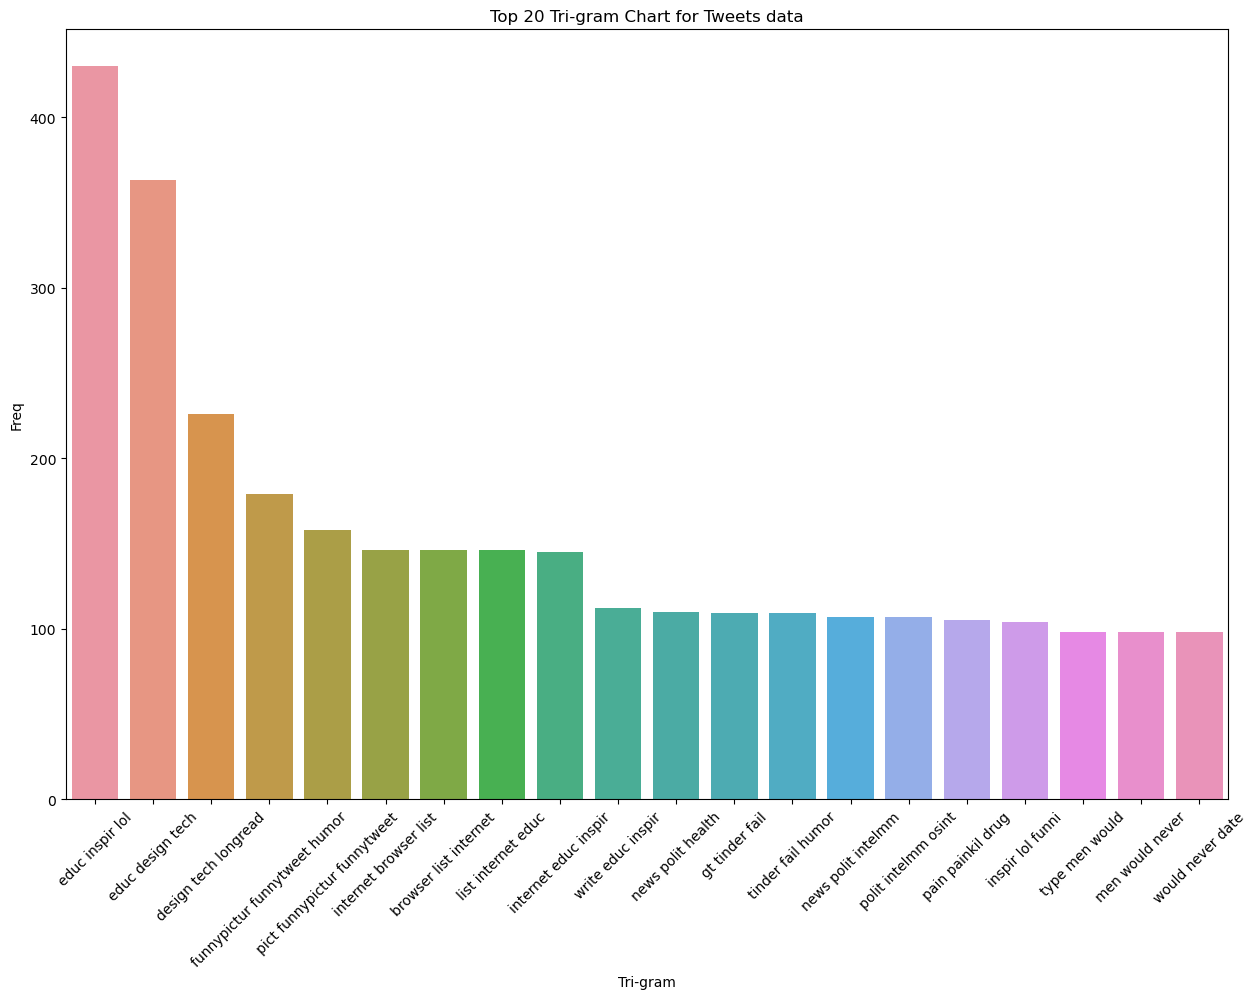

In [41]:
# Top 20 Tri-gram Bar chart for Tweets Data
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=tweets_df_tri['Tri-gram'][0:20],y=tweets_df_tri['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = tweets_df_tri["Tri-gram"][0:20])
plt.title('Top 20 Tri-gram Chart for Tweets data')
plt.show()

In [42]:
# Top 200 Bi-grams for Figurative Tweets data 
fig_words_bi = get_top_n2_words_bigram(tweets_figurative['tweets'], n=200) #top 200
fig_df_bi = pd.DataFrame(fig_words_bi)
fig_df_bi.columns=["Bi-gram", "Freq"]
fig_df_bi.head()

,Bi-gram,Freq
0,funni sarcasm,195
1,right sarcasm,121
2,look like,114
3,gon na,107
4,day sarcasm,103


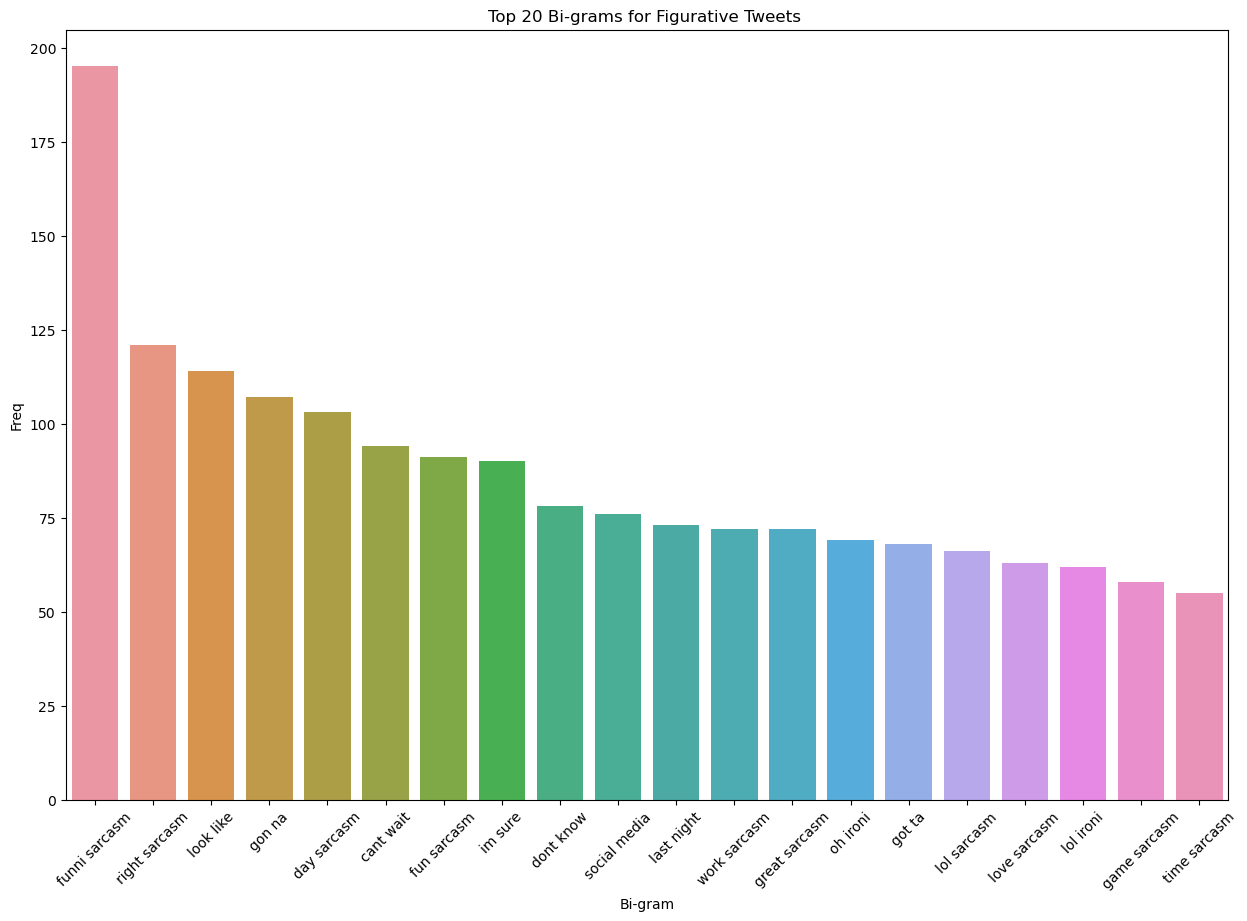

In [43]:
# Bi-gram Bar chart for Figurative tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=fig_df_bi['Bi-gram'][0:20],y=fig_df_bi['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = fig_df_bi["Bi-gram"][0:20])
plt.title('Top 20 Bi-grams for Figurative Tweets ')
plt.show()

In [44]:
# Tri-gram for tweets dataset
fig_tri = get_top_n2_words_trigram(tweets_figurative['tweets'], n=200) #top 200
fig_tri = pd.DataFrame(fig_tri)
fig_tri.columns=["Tri-gram", "Freq"]
fig_tri.head()

,Tri-gram,Freq
0,got ta love,29
1,much fun sarcasm,21
2,im gon na,20
3,cant wait see,17
4,good job sarcasm,15


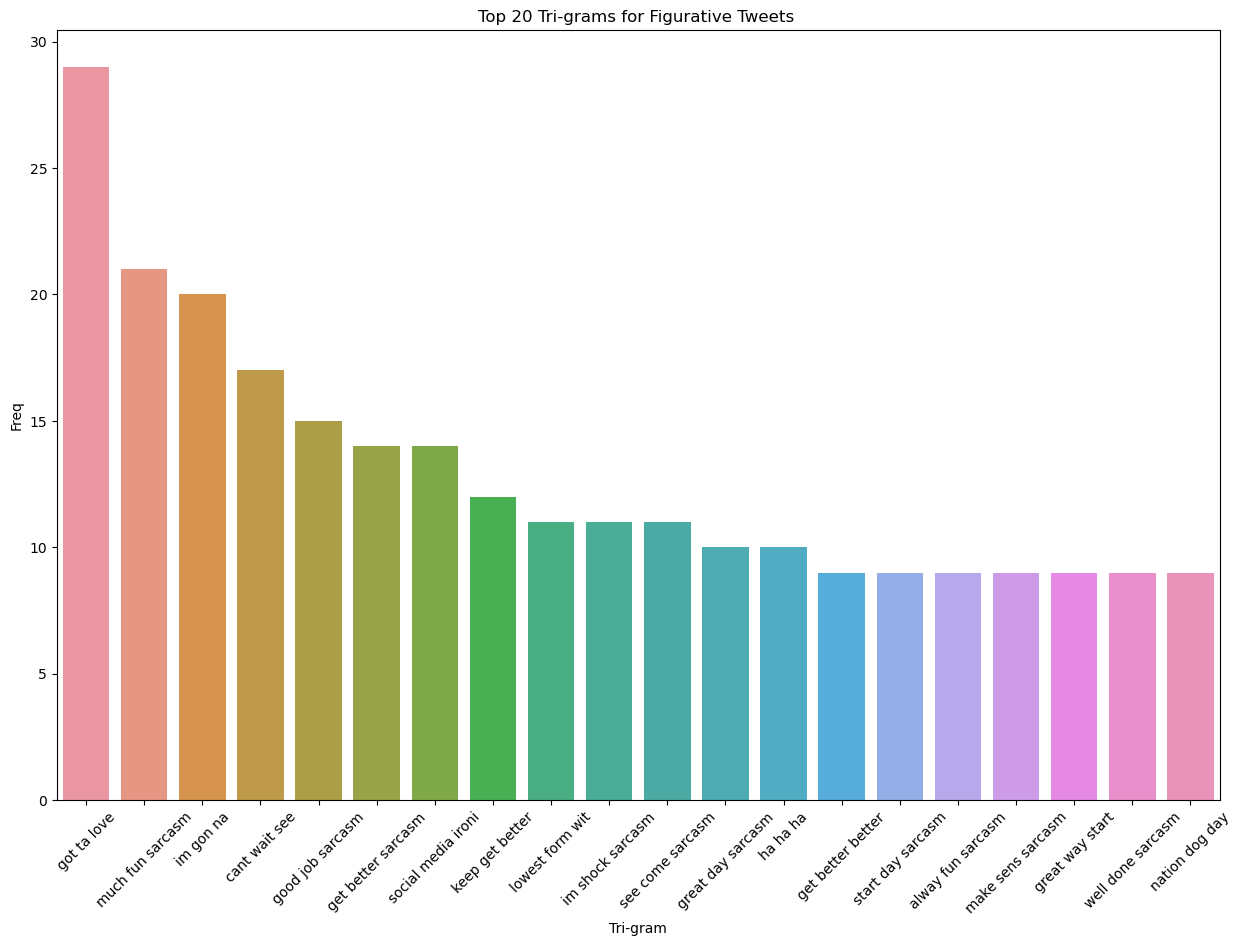

In [45]:
# Tri-gram bar chart for Figurative tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=fig_tri['Tri-gram'][0:20],y=fig_tri['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = fig_tri["Tri-gram"][0:20])
plt.title('Top 20 Tri-grams for Figurative Tweets ')
plt.show()

In [46]:
# Top 200 Bi-grams for Irony Tweets data 
irony_words_bi = get_top_n2_words_bigram(tweets_irony['tweets'], n=200) #top 200
irony_df_bi = pd.DataFrame(irony_words_bi)
irony_df_bi.columns=["Bi-gram", "Freq"]
irony_df_bi.head()

,Bi-gram,Freq
0,lol ironi,145
1,oh ironi,140
2,social media,110
3,day ironi,108
4,look like,102


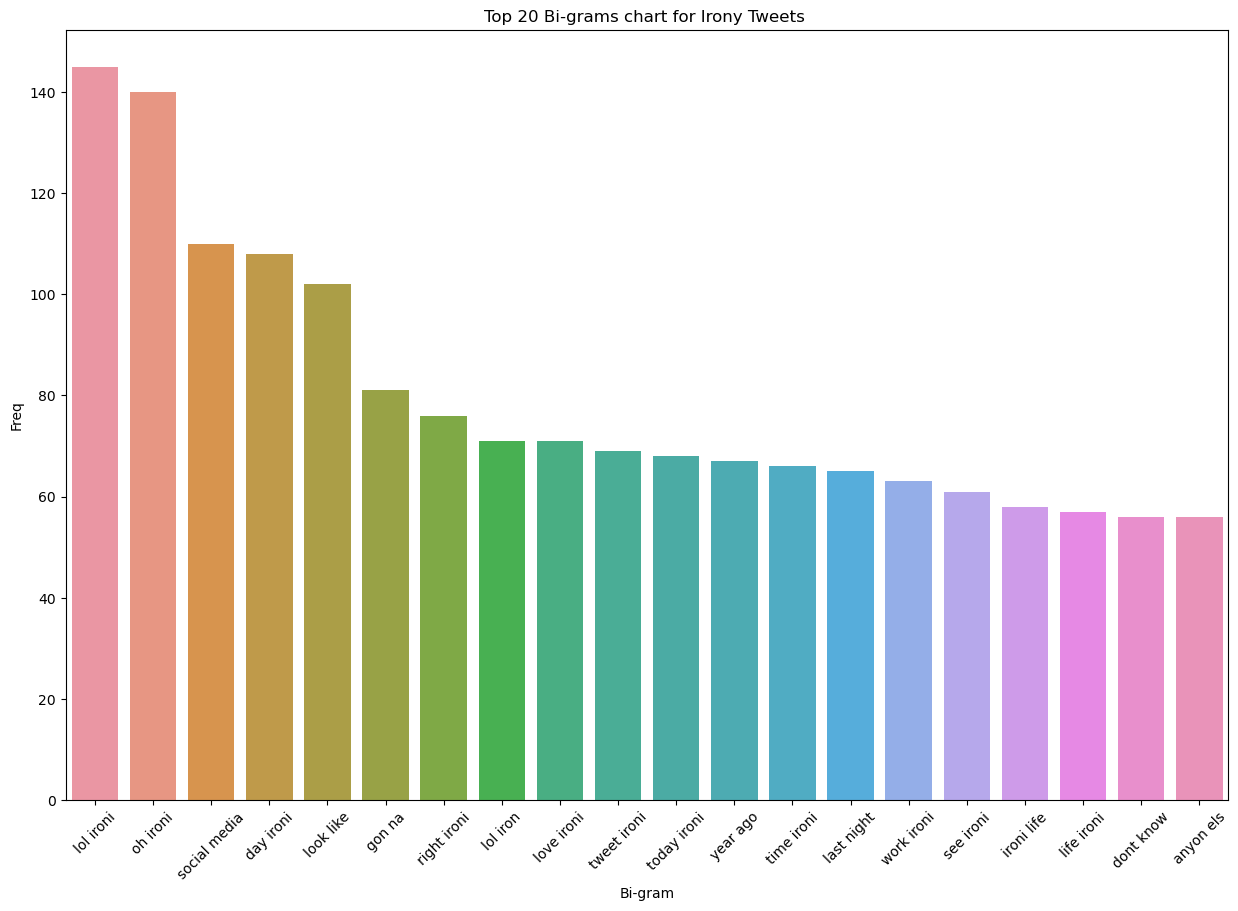

In [47]:
# Bi-gram Bar chart for Irony tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=irony_df_bi['Bi-gram'][0:20],y=irony_df_bi['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = irony_df_bi["Bi-gram"][0:20])
plt.title('Top 20 Bi-grams chart for Irony Tweets ')
plt.show()

In [48]:
# Tri-gram for Irony tweets data
irony_tri = get_top_n2_words_trigram(tweets_irony['tweets'], n=200) #top 200
irony_tri = pd.DataFrame(irony_tri)
irony_tri.columns=["Tri-gram", "Freq"]
irony_tri.head()


,Tri-gram,Freq
0,giggl offic ultim,26
1,offic ultim ironi,26
2,ultim ironi clickher,26
3,ironi clickher ironi,26
4,friday giggl offic,22


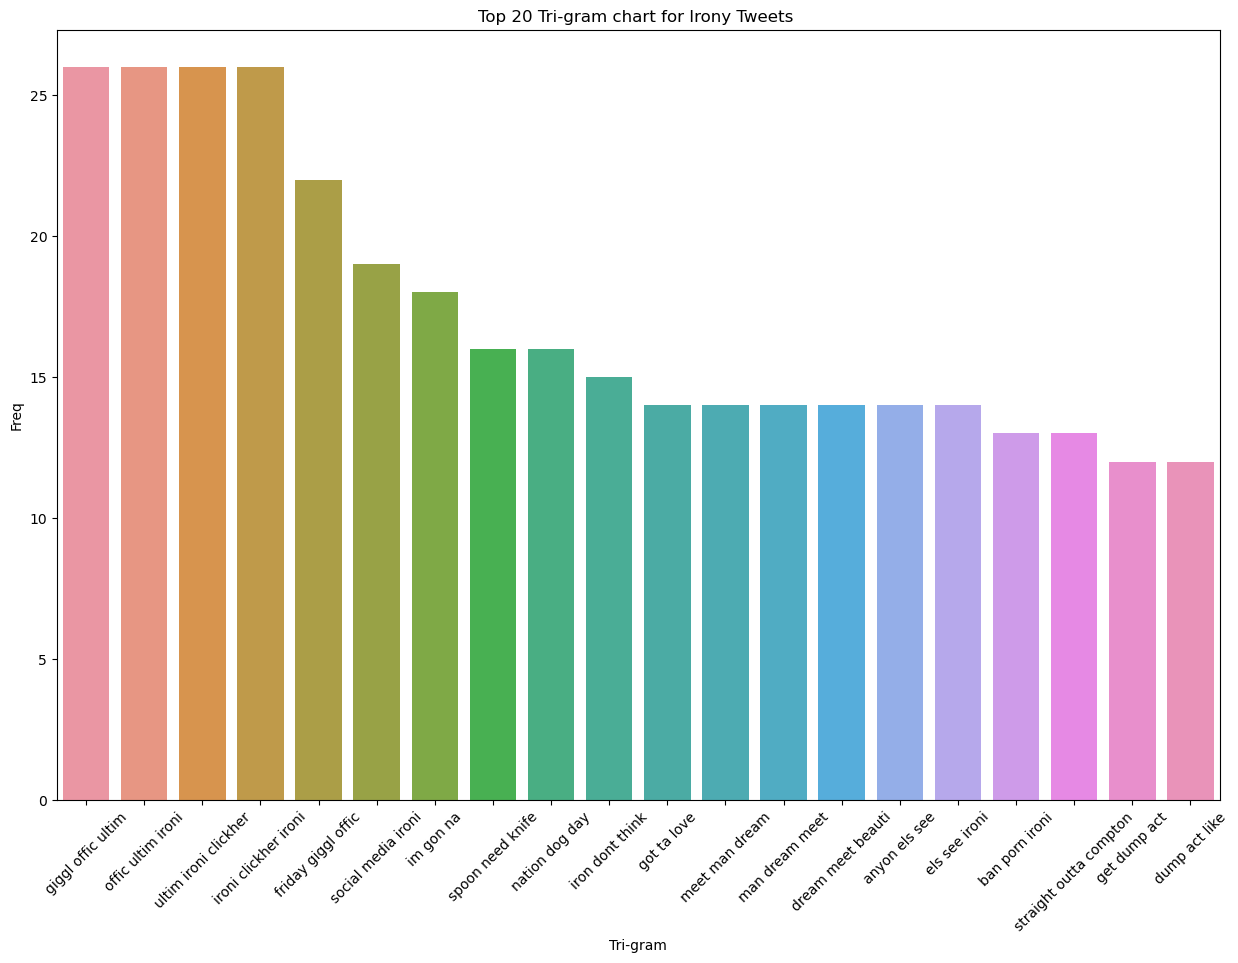

In [49]:
# Tri-gram bar chart for Irony tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=irony_tri['Tri-gram'][0:20],y=irony_tri['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = irony_tri["Tri-gram"][0:20])
plt.title('Top 20 Tri-gram chart for Irony Tweets ')
plt.show()

In [50]:
# Top 200 Bi-grams for Regular Tweets data 
reg_words_bi = get_top_n2_words_bigram(tweets_regular['tweets'], n=200) #top 200
reg_df_bi = pd.DataFrame(reg_words_bi)
reg_df_bi.columns=["Bi-gram", "Freq"]
reg_df_bi.head()

,Bi-gram,Freq
0,educ inspir,437
1,inspir lol,430
2,design tech,387
3,educ design,365
4,news polit,300


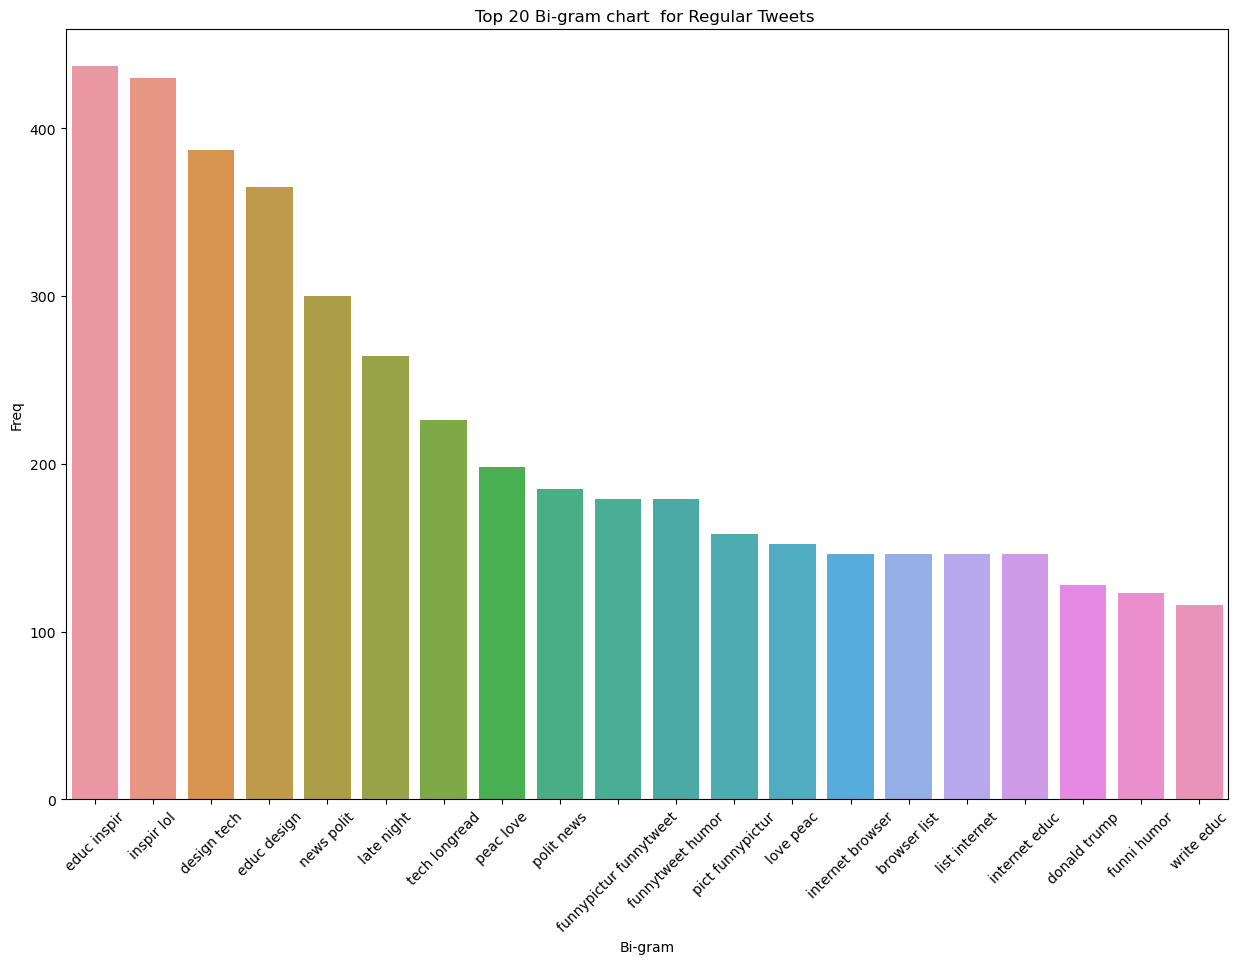

In [51]:
# Bi-gram Bar chart for Regular tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=reg_df_bi['Bi-gram'][0:20],y=reg_df_bi['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = reg_df_bi["Bi-gram"][0:20])
plt.title('Top 20 Bi-gram chart  for Regular Tweets ')
plt.show()

In [52]:
# Tri-gram for Regular tweets 
reg_words_tri = get_top_n2_words_trigram(tweets_regular['tweets'], n=200) #top 200
reg_tri = pd.DataFrame(reg_words_tri)
reg_tri.columns=["Tri-gram", "Freq"]
reg_tri.head()

,Tri-gram,Freq
0,educ inspir lol,430
1,educ design tech,363
2,design tech longread,226
3,funnypictur funnytweet humor,179
4,pict funnypictur funnytweet,158


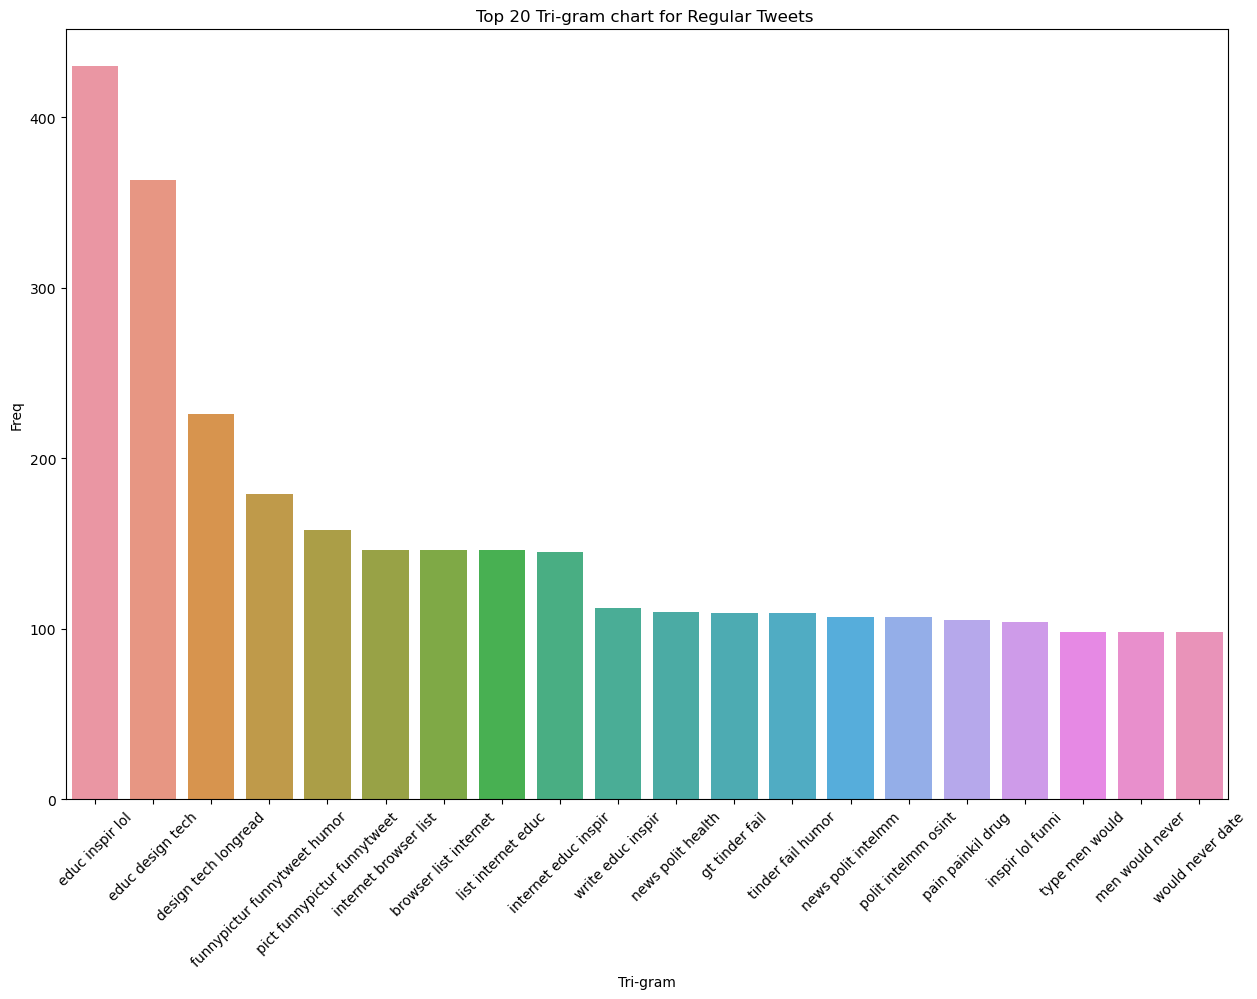

In [53]:
# Tri-gram bar chart for Regular tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=reg_tri['Tri-gram'][0:20],y=reg_tri['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = reg_tri["Tri-gram"][0:20])
plt.title('Top 20 Tri-gram chart for Regular Tweets ')
plt.show()

In [54]:
# Top 200 Bi-grams for Sarcasm Tweets data 
sar_words_bi = get_top_n2_words_bigram(tweets_sarcasm['tweets'], n=200) #top 200
sar_df_bi = pd.DataFrame(sar_words_bi)
sar_df_bi.columns=["Bi-gram", "Freq"]
sar_df_bi.head()

,Bi-gram,Freq
0,funni sarcasm,318
1,right sarcasm,203
2,day sarcasm,175
3,im sure,171
4,cant wait,163


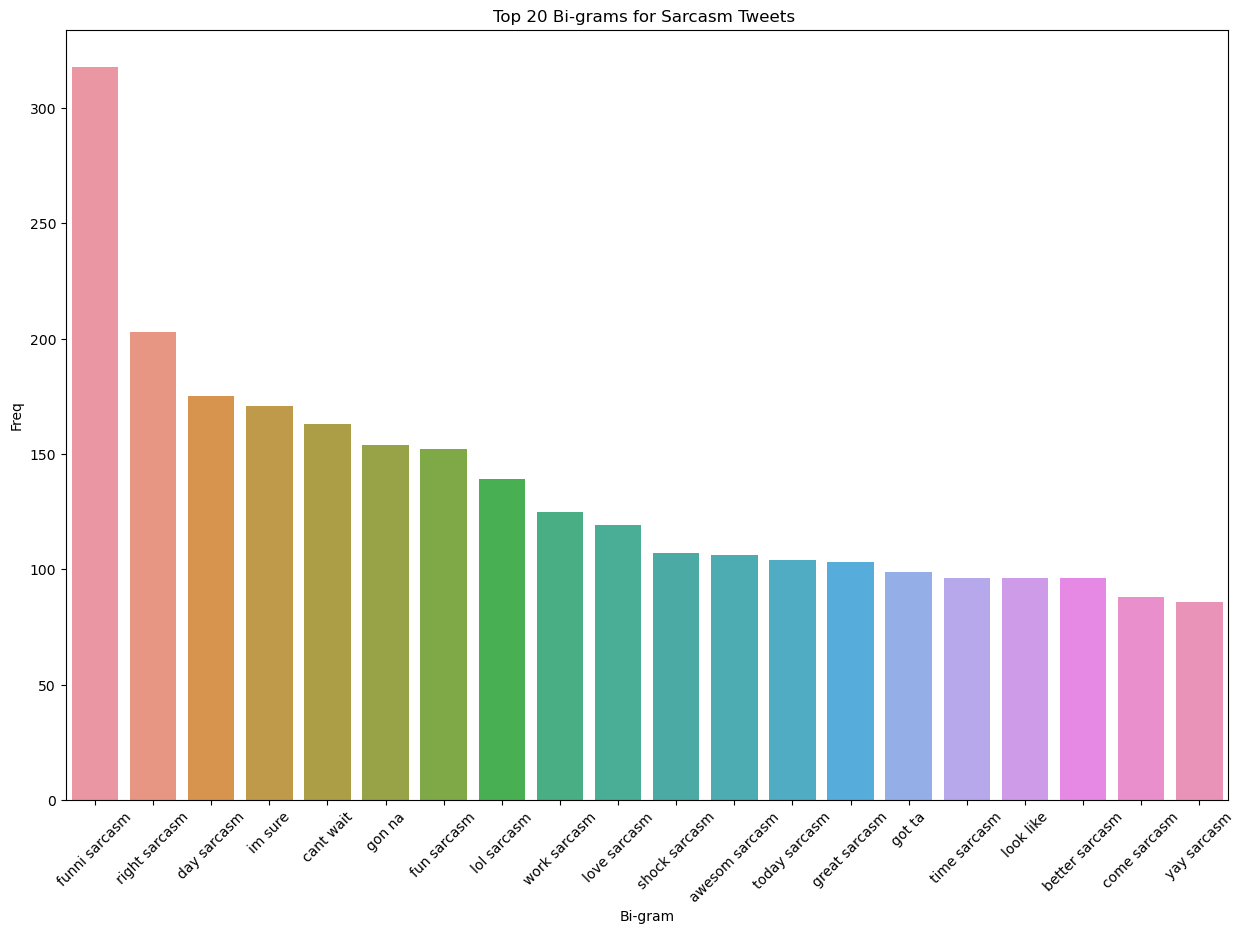

In [55]:
# Bi-gram Bar chart for Sarcasm tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=sar_df_bi['Bi-gram'][0:20],y=sar_df_bi['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = sar_df_bi["Bi-gram"][0:20])
plt.title('Top 20 Bi-grams for Sarcasm Tweets ')
plt.show()

In [56]:
# Tri-gram for Sarcasm tweets data
sar_words_tri = get_top_n2_words_trigram(tweets_sarcasm['tweets'], n=200) #top 200
sar_tri = pd.DataFrame(sar_words_tri)
sar_tri.columns=["Tri-gram", "Freq"]
sar_tri.head()

,Tri-gram,Freq
0,got ta love,51
1,see come sarcasm,30
2,much fun sarcasm,26
3,didnt see come,26
4,im shock sarcasm,25


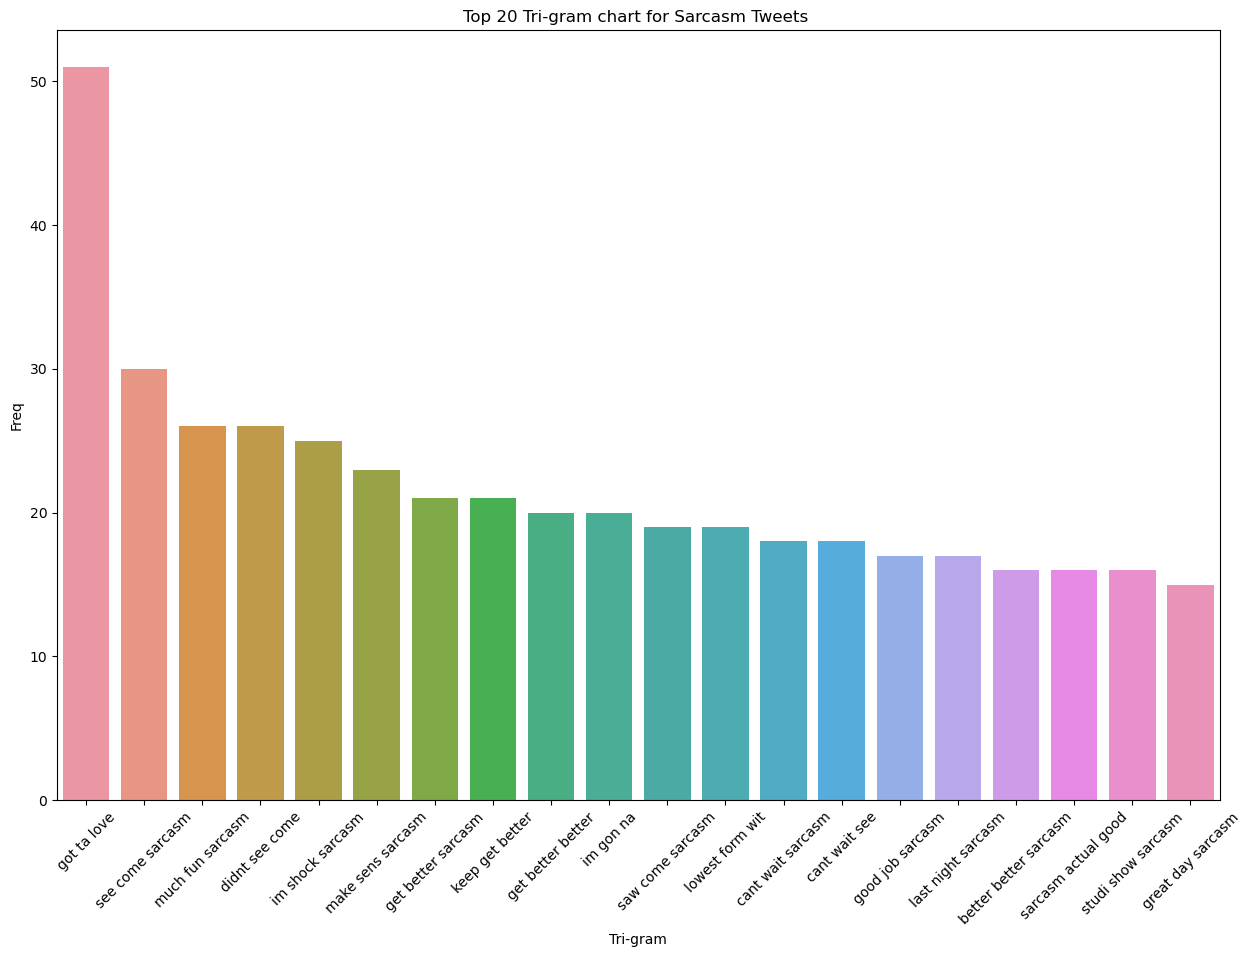

In [57]:
# Tri-gram bar chart for Sarcasm tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=sar_tri['Tri-gram'][0:20],y=sar_tri['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = sar_tri["Tri-gram"][0:20])
plt.title('Top 20 Tri-gram chart for Sarcasm Tweets ')
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81359 entries, 0 to 81358
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81359 non-null  object
 1   class   81359 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [59]:
df.head()

,tweets,class
0,awar dirti step get money staylight staywhit s...,figurative
1,sarcasm peopl dont understand diy artattack,figurative
2,iminworkjeremi medsingl dailymail reader sensi...,figurative
3,wilw get feel like game sarcasm,figurative
4,teacherarthurg rweingarten probabl miss text s...,figurative


!pip install langdetect
import pandas as pd
from langdetect import detect

def filter_non_english_words(text):
    words = text.split()
    english_words = [word for word in words if is_english_word(word)]
    filtered_text = ' '.join(english_words)
    return filtered_text

def is_english_word(word):
    try:
        language = detect(word)
        return language == 'en'
    except:
        return False

#### Assuming 'df' is your DataFrame with a column named 'tweets'

#### Apply the filtering function to remove non-English words from 'tweets' column
df['tweets'] = df['tweets'].apply(filter_non_english_words)


In [60]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['tweets'], df['class'], test_size=0.2, random_state=42)


# TFIDF Vectorization & Model Building

In [61]:
# TFIDF Vectorizer for VSM 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [62]:
# Tfidf Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features= 100,ngram_range=(1, 1), max_df = 0.5, smooth_idf=True)
# Fitting the data and transforming data
x_train_tfidf = tfidf.fit_transform(x_train)
# Transforming the testing data
x_test_tfidf = tfidf.transform(x_test)
# Building Model with Support Vector Machines
classifier = SVC()
classifier.fit(x_train_tfidf, y_train)

SVC()

In [63]:
y_pred = classifier.predict(x_test_tfidf)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  figurative       0.37      0.00      0.00      4168
       irony       0.67      1.00      0.80      4286
     regular       1.00      1.00      1.00      3699
     sarcasm       0.66      1.00      0.80      4119

    accuracy                           0.74     16272
   macro avg       0.68      0.75      0.65     16272
weighted avg       0.67      0.74      0.64     16272



### The evaluation shows that the model performs well for  "irony" and "regular", some part of "Sarcasm" & performng poorly for  "figurative"

In [65]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(x_train_tfidf,y_train)
train_pred_m = classifier_mb.predict(x_train_tfidf)
accuracy_train_m = np.mean(train_pred_m==y_train) 

test_pred_m = classifier_mb.predict(x_test_tfidf)
accuracy_test_m = np.mean(test_pred_m==y_test) 


In [66]:
print(classification_report(test_pred_m, y_test))

              precision    recall  f1-score   support

  figurative       0.13      0.33      0.18      1617
       irony       0.85      0.67      0.75      5428
     regular       0.98      0.98      0.98      3696
     sarcasm       0.89      0.66      0.76      5531

    accuracy                           0.70     16272
   macro avg       0.71      0.66      0.67     16272
weighted avg       0.82      0.70      0.75     16272



### Model Performing well for irony, regular & sarcasm, poorly for Figurative, its precision, recall & f1 score are very low

## Building model with Top 100 Features of Uni, Bi, Trigrams of TFIDF vectors

In [77]:
import pickle
model = {'stop': remove_stopwords, 'stemming': apply_stemming, 'tfidf' : tfidf, 'classifier': classifier_mb}
with open('trained_model_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Support Vector Machines Model With UNI, BI, Trigrams 
# Create separate vectorizers for unigrams, bigrams, and trigrams
import scipy.sparse as sparse

vectorizer_unigram = TfidfVectorizer(ngram_range=(1, 1), max_features=100)
vectorizer_bigram = TfidfVectorizer(ngram_range=(2, 2), max_features=100)
vectorizer_trigram = TfidfVectorizer(ngram_range=(3, 3), max_features=100)

# Fit the vectorizers to the training data and transform the training data
X_train_unigram = vectorizer_unigram.fit_transform(x_train)
X_train_bigram = vectorizer_bigram.fit_transform(x_train)
X_train_trigram = vectorizer_trigram.fit_transform(x_train)

# Transform the test data using the fitted vectorizers
X_test_unigram = vectorizer_unigram.transform(x_test)
X_test_bigram = vectorizer_bigram.transform(x_test)
X_test_trigram = vectorizer_trigram.transform(x_test)

# Concatenate the feature matrices for unigrams, bigrams, and trigrams
X_train_combined = sparse.hstack((X_train_unigram, X_train_bigram, X_train_trigram))
X_test_combined = sparse.hstack((X_test_unigram, X_test_bigram, X_test_trigram))

# Create a Logistic Regression classifier
classifier = SVC()

# Fit the classifier to the combined training data
classifier.fit(X_train_combined, y_train)

# Make predictions on the combined test set
test_pred = classifier.predict(X_test_combined)

# Print the classification report
print(classification_report(test_pred, y_test))

## The model performing poorly for figurative

In [ ]:
# Naive Bayes Model for Top 100 features of Unigrams, Bigrams, Trigrams
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(X_train_combined,y_train)

test_pred_m = classifier_mb.predict(X_test_combined)
accuracy_test_m = np.mean(test_pred_m==y_test) 


In [ ]:
!pip install gensim scikit-learn

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [ ]:
df.info()

In [ ]:
df['tweets'].isnull().sum()

In [ ]:
df['tweets'].info()

In [ ]:
df['class'].value_counts()

In [ ]:
len(df['tweets'])

In [ ]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

# Load and preprocess the tweet data
tweets = df['tweets']

# Train Word2Vec model
model = Word2Vec(tweets, vector_size=100, window=5, min_count=1, sg=1)

# Generate word embeddings
word_embeddings = model.wv

# Create tweet-level feature representations
features = []
removed_tweets = []
removed_indices = []

for i, tweet in enumerate(tweets):
    # Preprocess tweet: remove out-of-vocabulary words
    preprocessed_tweet = [word for word in tweet if word in word_embeddings.key_to_index]
    
    if preprocessed_tweet:
        tweet_embedding = [word_embeddings.get_vector(word) for word in preprocessed_tweet]
        tweet_embedding = np.mean(tweet_embedding, axis=0)  # Average word vectors
        features.append(tweet_embedding)
    else:
        removed_tweets.append(tweet)
        removed_indices.append(i)

# Convert the feature list to a numpy array
features = np.array(features)

# Create a DataFrame for removed tweets and indices
removed_df = pd.DataFrame({'Removed_Tweets': removed_tweets, 'Indices': removed_indices})

# Print the number of removed tweets
print(f"Number of removed tweets: {len(removed_tweets)}")


In [ ]:
removed_df

In [ ]:
df_cleaned = df.drop(removed_indices)
df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned.info()

In [ ]:
df_cleaned.head()

In [ ]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and preprocess the tweet data
tweets = df_cleaned['tweets']

# Train Word2Vec model
model = Word2Vec(tweets, vector_size=100, window=5, min_count=1, sg=1)

# Generate word embeddings
word_embeddings = model.wv

# Create tweet-level feature representations
features = []
for tweet in tweets:
    tweet_embedding = [word_embeddings[word] for word in tweet if word in word_embeddings]
    if tweet_embedding:
        tweet_embedding = np.mean(tweet_embedding, axis=0)  # Average word vectors
        features.append(tweet_embedding)

In [ ]:
# Convert labels to numerical values
labels = df_cleaned['class'].map({'figurative': 0, 'irony': 1, 'regular': 2, 'sarcasm': 3}).values

# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# Train logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

In [ ]:
# Building a random forest classifier model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [ ]:
kfold=KFold(n_splits=10, random_state=None)

num_trees=100
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

In [ ]:
pred=model.predict(X_test)
pred

In [ ]:
np.mean(pred==y_test)

In [ ]:
results=cross_val_score(model,X_train,y_train,cv=kfold)
print(results.mean())

In [ ]:
# Support Vector Classifier
classifier = SVC()
classifier.fit(X_train, y_train)

In [ ]:
test_pred = classifier.predict(X_test)

# Print the classification report
print(classification_report(test_pred, y_test))